In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# PREPARATION

In [3]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df).transform(df)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [4]:
for col in df.columns:
    df.loc[df[col] == False, col] = 0
    df.loc[df[col] == True, col] = 1
    
    
df.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,0,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,1
2,1,0,0,1,0,1,1,1,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,0,0


# VISUALIZATION

<AxesSubplot:>

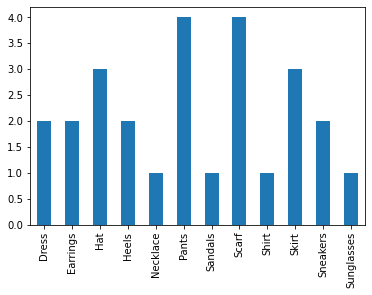

In [9]:
df.sum().plot.bar()

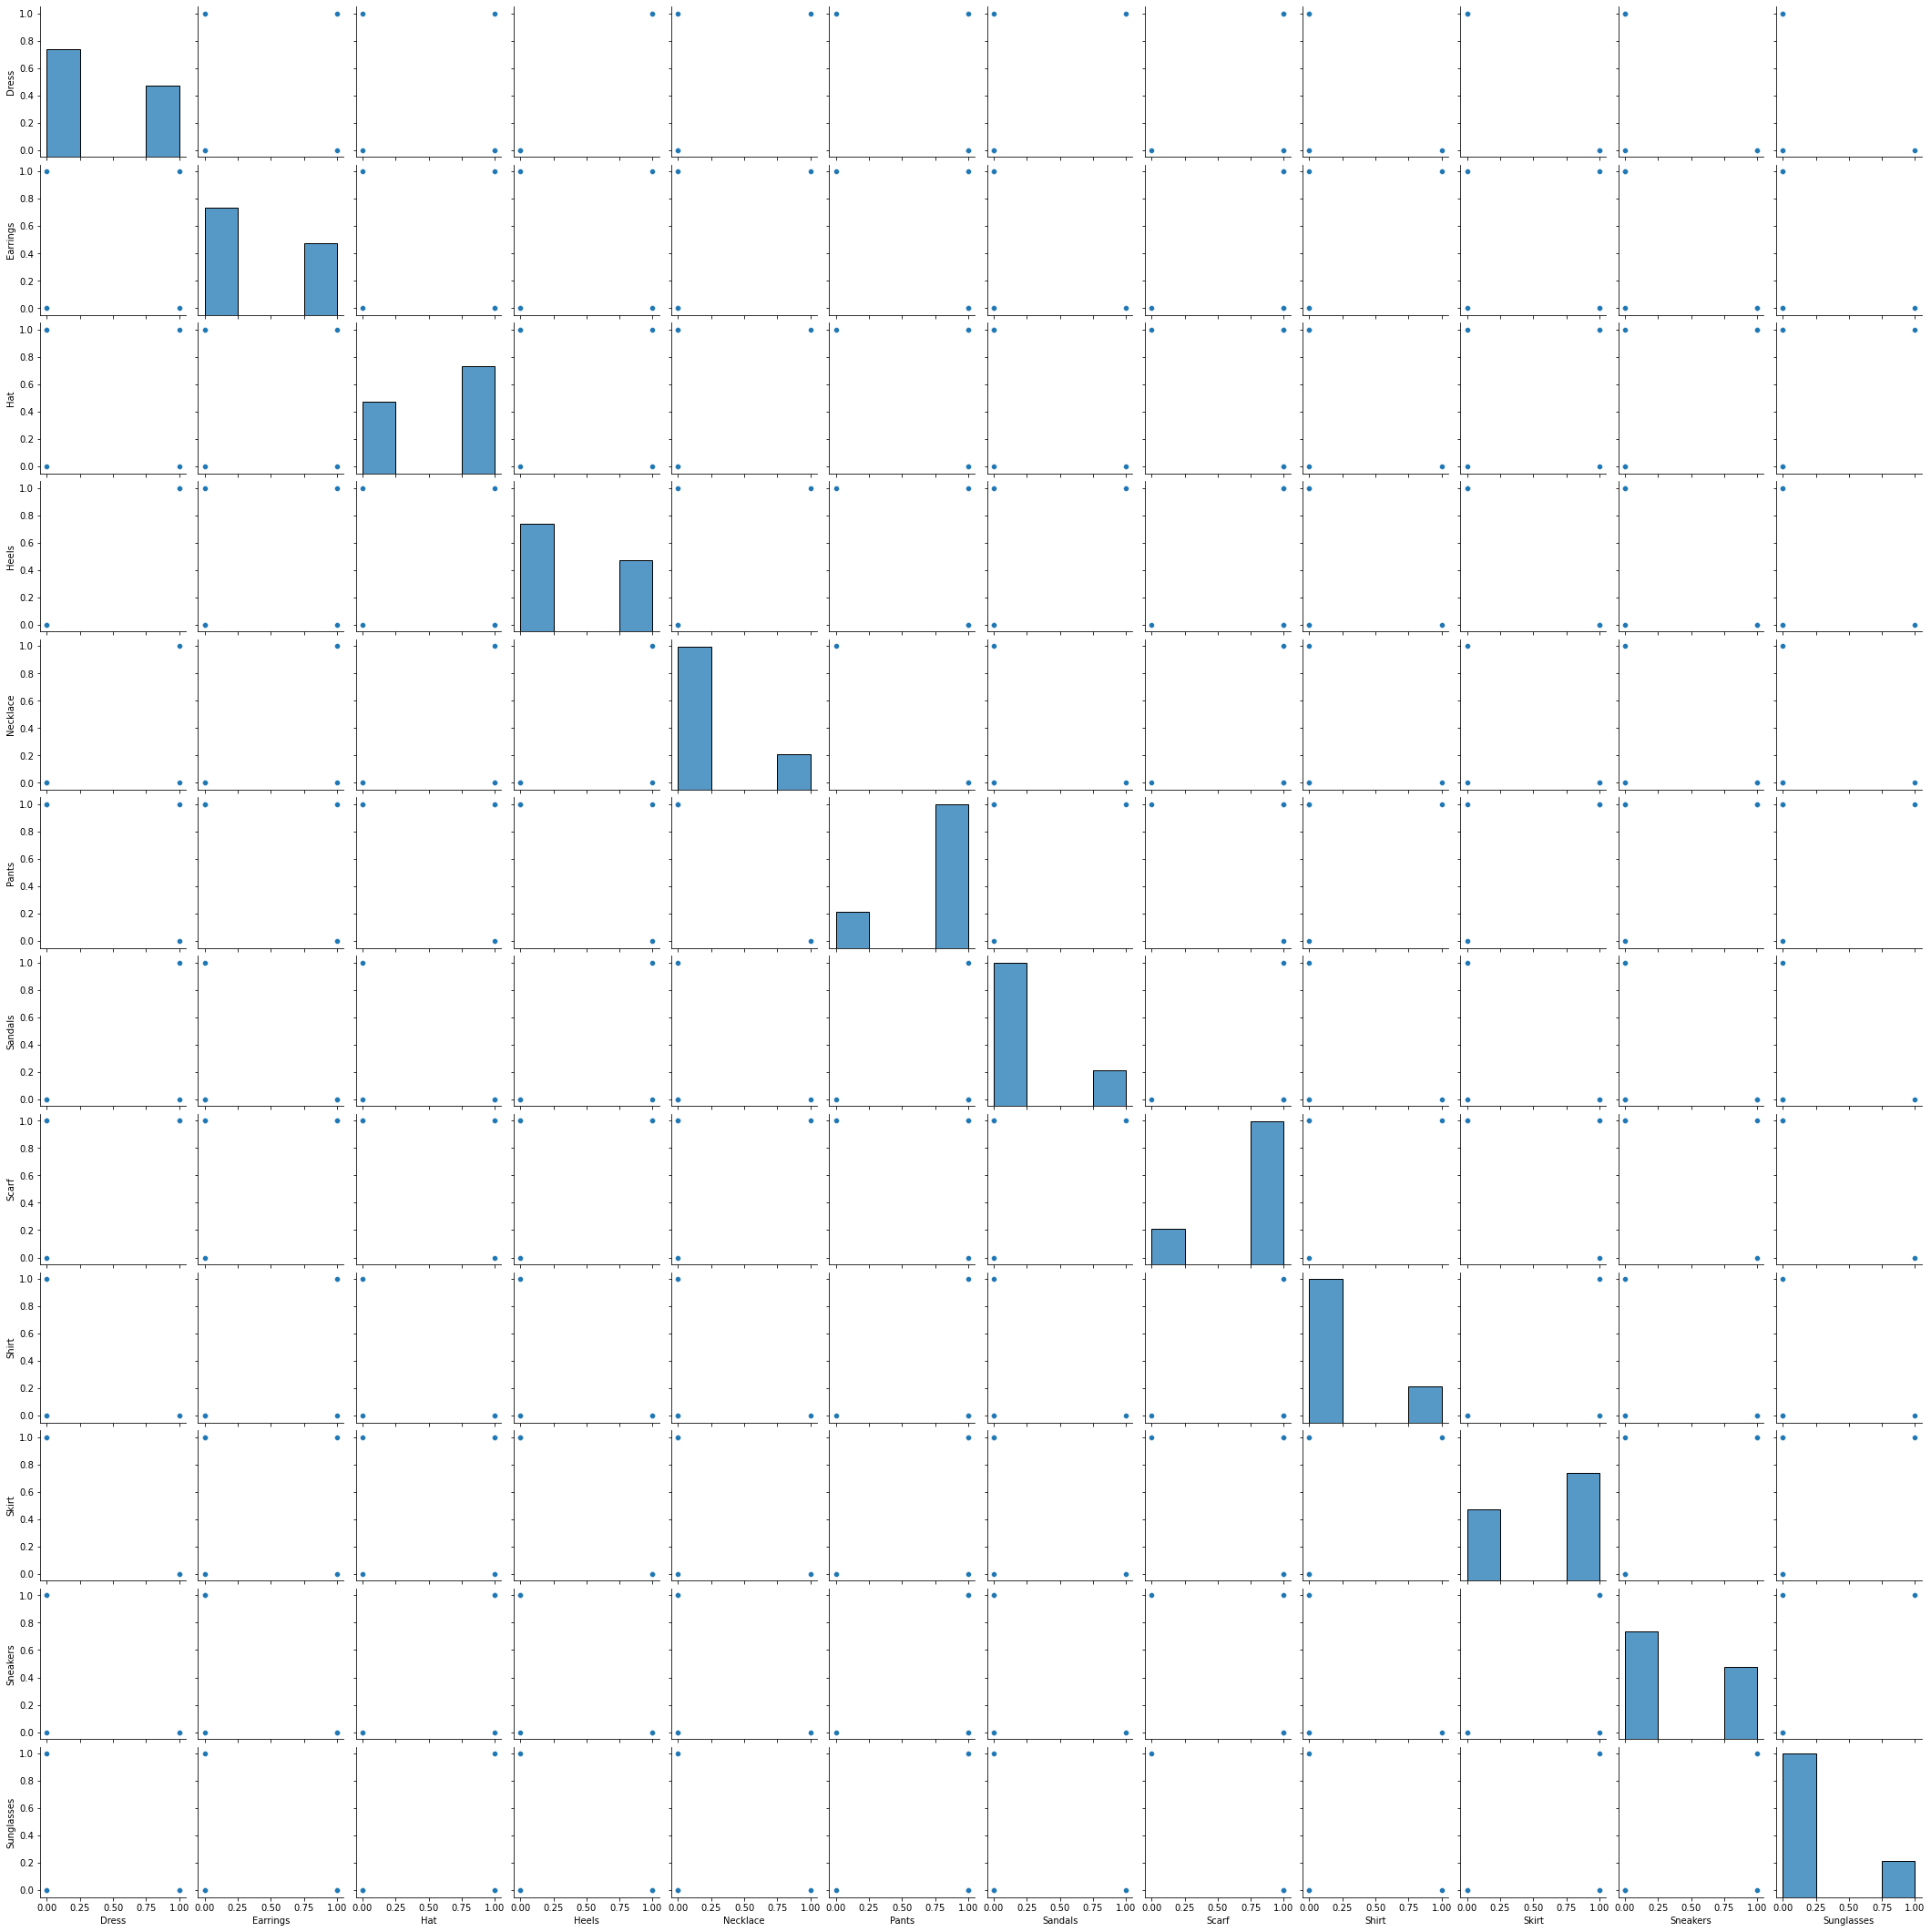

In [12]:
sns.pairplot(df)

# 1.SUPPORT

In [18]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.3, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Dress, Heels)"
9,0.4,"(Dress, Scarf)"


# 2.CONFIDENCE

In [19]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Heels),0.4,0.4,0.4,1.00,2.500000,0.24,inf
1,(Heels),(Dress),0.4,0.4,0.4,1.00,2.500000,0.24,inf
2,(Dress),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
3,(Earrings),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
4,(Sneakers),(Hat),0.4,0.6,0.4,1.00,1.666667,0.16,inf
5,(Heels),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
6,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
7,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
8,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
9,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.250000,0.12,inf


# 3.LIFT

In [20]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
1,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
2,(Dress),(Scarf),0.4,0.8,0.4,1.000000,1.250000,0.08,inf
3,(Scarf),(Dress),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
4,(Earrings),(Scarf),0.4,0.8,0.4,1.000000,1.250000,0.08,inf
...,...,...,...,...,...,...,...,...,...
61,"(Sneakers, Skirt)","(Hat, Pants)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
62,(Pants),"(Hat, Sneakers, Skirt)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.2
63,(Hat),"(Skirt, Sneakers, Pants)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
64,(Sneakers),"(Hat, Skirt, Pants)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


# Market_Basket_Optimisation

In [21]:
df =pd.read_csv("C:/Users/hp/Downloads/Market_Basket_Optimisation.csv")

# PREPARATION